# ENE129 - T1

In [1]:
import CoolProp
import CoolProp.CoolProp as CP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Questão 2

## 1 Ciclo a gás 

### 1.1 Primeira lei

#### Estado 1

Dados fornecidos:

In [2]:
# Pressão
P1 = 1.013*1e5 #Pa
# Temperatura
T1 = 303.15 #K

Cálculos:

In [3]:
# Entalpia
h1 = CP.PropsSI('H', 'T', T1, 'P', P1, 'Air') #J/Kg
# Volume específico
v1 = 1/CP.PropsSI('D', 'T', T1, 'P', P1, 'Air') #m^3/kg
# Entropia
s1 = CP.PropsSI('S', 'T', T1, 'P', P1, 'Air') #J/kg*K

#### Estado 2

Dados fornecidos:

In [4]:
# Pressão
P2 = 30*1e5 #Pa
# Rendimento isentrópico
nc = 0.86 #Compressor

Cálculos:

In [5]:
# Isentrópico
s2s = s1
h2s = CP.PropsSI('H', 'P', P2, 'S', s2s, 'Air') #J/kg
# Entalpia
# Temos: nc = Ws/Wr = (h2s-h1)/(h2-h1)
h2 = ((h2s-h1)/nc)+h1 #J/Kg
# Temperatura
T2 = CP.PropsSI('T', 'P', P2, 'H', h2, 'Air') #K
# Entropia
s2 = CP.PropsSI('S', 'P', P2, 'H', h2, 'Air') #J/kg*K
# Volume específico
v2 = 1/CP.PropsSI('D', 'P', P2, 'H', h2, 'Air') #m^3/kg

####  Estado 3

Dados fornecidos:

In [6]:
# Temperatura
T3 = 1573.15 #K
# Pressão constante no aquecimento
P3 = P2 #Pa

Cálculos:

In [7]:
# Entalpia
h3 = CP.PropsSI('H', 'T', T3, 'P', P3, 'Air') #J/Kg
# Entropia
s3 = CP.PropsSI('S', 'T', T3, 'P', P3, 'Air') #J/kg*K
# Volume específico
v3 = 1/CP.PropsSI('D', 'T', T3, 'P', P3, 'Air') #m^3/kg

####  Estado 4

Dados fornecidos:

In [8]:
# Rejeição de calor a pressão constante
# Pressão
P4 = 1.013*1e5 #Pa
# Rendimento isentrópico
ntg = 0.90 #Turbina a gás

Cálculos:

In [9]:
# Isentrópico
s4s = s3
h4s = CP.PropsSI('H', 'P', P4, 'S', s4s, 'Air') #J/kg
# Entalpia
# Temos: ntg = Wr/Ws = (h3-h4)/(h3-h4s) 
h4 = h3-(ntg*(h3-h4s)) #J/Kg
# Entropia
s4 = CP.PropsSI('S', 'P', P4, 'H', h4, 'Air') #J/kg*K
# Temperatura
T4 = CP.PropsSI('T', 'P', P4, 'H', h4, 'Air') #K
# Volume específico
v4 = 1/CP.PropsSI('D', 'P', P4, 'H', h4, 'Air') #m^3/kg

#### Estado 5

Dados fornecidos:

In [10]:
# Temperatura
T5 = 1023.15 #K
# Pressão constante no aquecimento
P5 = P4

Cálculos:

In [11]:
# Entalpia
h5 = CP.PropsSI('H', 'T', T5, 'P', P5, 'Air') #J/kg
# Entropia
s5 = CP.PropsSI('S', 'T', T5, 'P', P5, 'Air') #J/kg*K
# Volume específico
v5 = 1/CP.PropsSI('D', 'T', T5, 'P', P5, 'Air') #m^3/kg

#### Estado 6

Dados fornecidos:

In [12]:
# Parte do ciclo a gás
#
# Pressão
P6 = 1.013*1e5 #Pa
m_gas = 450 #Kg/s

# Parte do ciclo a vapor
#
#Vazão mássica
m_vapor = 200/2 #Kg/s 

# Vapor superaquecido
# Temperatura
T_vapor = 823.15 #K
# Pressão
P_vapor = 125*1e5 #Pa
# Entalpia
h_vapor = CP.PropsSI('H', 'T', T_vapor, 'P', P_vapor, 'Water') #J/kg

# Água de alimentação
# Temperatura
T_agua = 303.15 #K
# Pressão
P_agua = 125*1e5 #Pa
# Entalpia
h_agua = CP.PropsSI('H', 'T', T_agua, 'P', P_agua, 'Water') #J/kg
print(h1)
print(h_agua)

429468.0918052085
137080.532154621


Calcular o estado 6:

In [13]:
# Temos: 0 = m_gas*(h5 - h6) + m_vapor*(h_agua - h_vapor) 
# h6 = (h5*m_gas + m_vapor*(h_agua - h_vapor))/m_gas
# h6 = h5 + (m_vapor*/m_gas)*(h_agua - h_vapor)

# Entalpia
print(m_vapor)
print(m_gas)
print(h_agua)
print(h_vapor)
h6 = h5 + ((m_vapor/m_gas)*(h_vapor-h_agua)) #J/kg
print(h6)
# Entropia
s6 = CP.PropsSI('S', 'P', P6, 'H', h6, 'Air') #J/kg*K
# Temperatura
T6 = CP.PropsSI('T', 'P', P6, 'H', h6, 'Air') #K
# Volume específico
v6 = 1/CP.PropsSI('D', 'P', P6, 'H', P6, 'Air') #m^3/kg

100.0
450
137080.532154621
3476514.5797771104
1941078.393009752


### 1.2  Tabela

#### Construindo o DataFrame

In [14]:
# Pressão de cada estado 
P_list = np.array([P1, P2, P3, P4, P5, P6]) #Pa
P_list = np.apply_along_axis(lambda x: x/1e5, 0, P_list) #Converte para Bar
P_list = np.around(P_list, decimals=4)

# Temperatura de cada estado
T_list = np.array([T1, T2, T3, T4, T5, T6]) #K
T_list = np.apply_along_axis(lambda x: x-273.15, 0, T_list) #Converte para •C
T_list = np.around(T_list, decimals=4)

# Volume específico de cada estado
v_list = np.array([v1, v2, v3, v4, v5, v6]) #m^3/kg
v_list = np.around(v_list, decimals=4)

# Entalpia de cada estado
h_list = np.array([h1, h2, h3, h4, h5, h6]) #J/Kg
h_list = np.apply_along_axis(lambda x: x*1e-3, 0, h_list) #Converte para KJ/Kg
h_list = np.around(h_list, decimals=4)

# Entropia de cada estado
s_list = np.array([s1, s2, s3, s4, s5, s6]) #J/Kg*K
s_list = np.apply_along_axis(lambda x: x*1e-3, 0, s_list) #Converte para KJ/Kg*K
s_list = np.around(s_list, decimals=4)

# Estados
e_list = np.arange(1,7)

In [15]:
data = {'Pressão (Bar)': P_list, 
        'Temperatura (ºC)': T_list, 
        'Volume.Específico (m^3/kg)': v_list,
        'Entalpia (KJ/Kg)': h_list,
        'Entropia (KJ/Kg*K)': s_list,
        'Estado': e_list}

df = pd.DataFrame.from_dict(data)
df.set_index('Estado')

,Pressão (Bar),Temperatura (ºC),Volume.Específico (m^3/kg),Entalpia (KJ/Kg),Entropia (KJ/Kg*K)
Estado,,,,,
1,1.013,30.0000,0.8588,429.4681,3.8973
2,30.000,576.7903,0.0822,1004.7554,3.9964
3,30.000,1300.0000,0.1515,1853.7792,4.7158
4,1.013,496.1595,2.1807,914.7972,4.8607
5,1.013,750.0000,2.9002,1198.9819,5.1796
6,1.013,1373.5638,0.1106,1941.0784,5.7444


### Gráfico Ts

In [16]:
def f_iso(s, p, fluid):
    return CP.PropsSI('T', 'P', p, 'S', s*1e3, fluid)

In [17]:
iso_1 = 1.013*1e5 #bar
iso_2 = 30*1e5 #bar

x_1 = np.arange(2, 8, 0.2)
y_1 = f_iso(x_1, iso_1, 'Air')

x_2 = np.arange(2, 8, 0.2)
y_2 = f_iso(x_1, iso_2, 'Air')

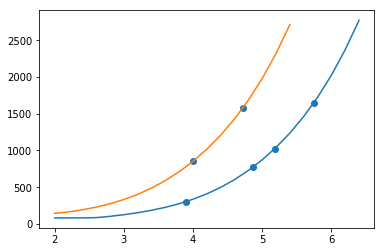

In [18]:
# isobáricas
plt.plot(x_1, y_1, x_2, y_2)
# estados
plt.scatter(df.iloc[:,4], df.iloc[:,1].map(lambda x: x+273.15))
plt.show()

## 2 Ciclo a vapor

### 2.1 Primeira lei

#### Estado 1

Dados fornecidos:

In [19]:
# Pressão
P1 = 125*1e5 #Pa
# Temperatura
T1 = 823.15 #K

Cálculos:

In [20]:
# Entalpia
h1 = CP.PropsSI('H', 'T', T1, 'P', P1, 'Water') #J/Kg
# Volume específico
v1 = 1/CP.PropsSI('D', 'T', T1, 'P', P1, 'Water') #m^3/kg
# Entropia
s1 = CP.PropsSI('S', 'T', T1, 'P', P1, 'Water') #J/kg*K
# Título
x1 = CP.PropsSI('Q', 'T', T1, 'P', P1, 'Water')

#### Estado 2

Dados fornecidos:

In [21]:
# Pressão
HP1 = 45*1e5 #Pa
P2 = HP1
# Rendimento isentrópico
ntv = 0.90 #Estágios da turbina a vapor

Cálculos:

In [22]:
# Isentrópico
s2s = s1
h2s = CP.PropsSI('H', 'P', P2, 'S', s2s, 'Water') #J/kg
# Entalpia
# Temos: ntv = Wr/Ws = (h1-h2)/(h1-h2s) 
h2 = h1-(ntv*(h1-h2s)) #J/Kg
# Entropia
s2 = CP.PropsSI('S', 'P', P2, 'H', h2, 'Water') #J/kg*K
# Temperatura
T2 = CP.PropsSI('T', 'P', P2, 'H', h2, 'Water') #K
# Volume específico
v2 = 1/CP.PropsSI('D', 'P', P2, 'H', h2, 'Water') #m^3/kg
# Título
x2 = CP.PropsSI('Q', 'P', P2, 'H', h2, 'Water')

#### Estado 3

Dados fornecidos:

In [23]:
# Pressão
HP2 = 25*1e5 #Pa
P3 = HP2
# Rendimento isentrópico
ntv = 0.90 #Estágios da turbina a vapor

Cálculos:

In [24]:
# Isentrópico
s3s = s2
h3s = CP.PropsSI('H', 'P', P3, 'S', s3s, 'Water') #J/kg
# Entalpia
# Temos: ntv = Wr/Ws = (h2-h3)/(h2-h3s) 
h3 = h2-(ntv*(h2-h3s)) #J/Kg
# Entropia
s3 = CP.PropsSI('S', 'P', P3, 'H', h3, 'Water') #J/kg*K
# Temperatura
T3 = CP.PropsSI('T', 'P', P3, 'H', h3, 'Water') #K
# Volume específico
v3 = 1/CP.PropsSI('D', 'P', P3, 'H', h3, 'Water') #m^3/kg
# Título
x3 = CP.PropsSI('Q', 'P', P3, 'H', h3, 'Water')

#### Estado 4

Dados fornecidos:

In [25]:
# Pressão
LP1 = 7*1e5 #Pa
P4 = LP1
# Rendimento isentrópico
ntv = 0.90 #Estágios da turbina a vapor

Cálculos:

In [26]:
# Isentrópico
s4s = s3
h4s = CP.PropsSI('H', 'P', P4, 'S', s4s, 'Water') #J/kg
# Entalpia
# Temos: ntv = Wr/Ws = (h3-h4)/(h3-h4s) 
h4 = h3-(ntv*(h3-h4s)) #J/Kg
# Entropia
s4 = CP.PropsSI('S', 'P', P4, 'H', h4, 'Water') #J/kg*K
# Temperatura
T4 = CP.PropsSI('T', 'P', P4, 'H', h4, 'Water') #K
# Volume específico
v4 = 1/CP.PropsSI('D', 'P', P4, 'H', h4, 'Water') #m^3/kg
# Título
x4 = CP.PropsSI('Q', 'P', P4, 'H', h4, 'Water')

#### Estado 5

Conserva as propriedades intensivas do **estado 4** após o divisor **D2**.

In [27]:
# Pressão
P5 = P4
# Temperatura
T5 = T4
# Entalpia
h5 = h4 #Extensiva
# Entropia
s5 = s4 #Extensiva
# Volume específico
v5 = v4
# Título
x5 = x4

#### Estado 6

Conserva as propriedades intensivas do **estado 4** após o divisor **D2**.

In [28]:
# Pressão
P6 = P4
# Temperatura
T6 = T4
# Entalpia
h6 = h4 #Extensiva
# Entropia
s6 = s4 #Extensiva
# Volume específico
v6 = v4
# Título
x6 = x4

#### Estado 8

Dados fornecidos:

In [29]:
# Pressão
LP2 = 0.3*1e5 #Pa
P8 = LP2
# Rendimento isentrópico
ntv = 0.90 #Estágios da turbina a vapor

Cálculos:

In [30]:
# Isentrópico
s8s = s5
h8s = CP.PropsSI('H', 'P', P8, 'S', s8s, 'Water') #J/kg
# Entalpia
# Temos: ntv = Wr/Ws = (h5-h8)/(h5-h8s) 
h8 = h5-(ntv*(h5-h8s)) #J/Kg
# Entropia
s8 = CP.PropsSI('S', 'P', P8, 'H', h8, 'Water') #J/kg*K
# Temperatura
T8 = CP.PropsSI('T', 'P', P8, 'H', h8, 'Water') #K
# Volume específico
v8 = 1/CP.PropsSI('D', 'P', P8, 'H', h8, 'Water') #m^3/kg
# Título
x8 = CP.PropsSI('Q', 'P', P8, 'H', h8, 'Water')

#### Estado 9

Líquido saturado na saída do **condensador**.

In [31]:
# Pressão
P9 = P8 #Pa
# Temperatura
T9 = T8 #K
# Título
x9 = 0 #Água saturada
# Entalpia
h9 = CP.PropsSI('H', 'P', P9, 'Q', x9, 'Water') #J/kg
# Entropia
s9 = CP.PropsSI('S', 'P', P9, 'Q', x9, 'Water') #J/kg
# Volume específico
v9 = 1/CP.PropsSI('D', 'P', P9, 'Q', x9, 'Water') #J/kg


#### Estado 10

Dados fornecidos:

In [32]:
# Pressão
P10 = 10*1e5 #Pa
# Rendimento isentrópico
nb = 0.85 #Bomba

Cálculos:

In [33]:
# Isentrópico
s10s = s9
h10s = CP.PropsSI('H', 'P', P10, 'S', s10s, 'Water') #J/kg
# Entalpia
# Temos: nb = Wr/Ws = (h10s-h9)/(h10-h9) 
h10 = ((h10s-h9)/nb)+h9 #J/Kg
# Entropia
s10 = CP.PropsSI('S', 'P', P10, 'H', h10, 'Water') #J/kg*K
# Temperatura
T10 = CP.PropsSI('T', 'P', P10, 'H', h10, 'Water') #K
# Volume específico
v10 = 1/CP.PropsSI('D', 'P', P10, 'H', h10, 'Water') #m^3/kg
# Título
x10 = CP.PropsSI('Q', 'P', P10, 'H', h10, 'Water')

#### Estado 12

Dados fornecidos:

In [34]:
# Pressão
P12 = 2*1e5 #Pa 
# Temperatura
T12 = 303.15 #ºC

Cálculos:

In [35]:
# Entalpia 
h12 = CP.PropsSI('H', 'P', P12, 'T', T12, 'Water') #J/kg
# Entropia
s12 = CP.PropsSI('S', 'P', P12, 'T', T12, 'Water') #J/kg*K
# Volume específico
v12 = 1/CP.PropsSI('D', 'P', P12, 'T', T12, 'Water') #m^3/kg
# Título
x12 = CP.PropsSI('Q', 'P', P12, 'T', T12, 'Water')

#### Estado 11

Conserva as propriedades do **estado 10** após a válvula **V2**.

In [36]:
# Pressão
P12 = 2*1e5 #Pa 
P11 = P12
# Entalpia
h11 = h10

In [37]:
# Entropia
s11 = CP.PropsSI('S', 'P', P11, 'H', h11, 'Water') #J/kg*K
# Volume específico
v11 = 1/CP.PropsSI('D', 'P', P11, 'H', h11, 'Water') #m^3/kg
# Título
x11 = CP.PropsSI('Q', 'P', P11, 'H', h11, 'Water') #J/kg*K
# Temperatura
T11 = CP.PropsSI('T', 'P', P11, 'H', h11, 'Water') #J/kg*K

#### Estado 13

Conserva as propriedades do **estado 10** após a válvula **V2**.

In [38]:
# Pressão
P13 = P12
# Entalpia
h13 = h11

In [39]:
# Entropia
s13 = CP.PropsSI('S', 'P', P13, 'H', h13, 'Water') #J/kg*K
# Volume específico
v13 = 1/CP.PropsSI('D', 'P', P13, 'H', h13, 'Water') #m^3/kg
# Título
x13 = CP.PropsSI('Q', 'P', P13, 'H', h13, 'Water') 
# Temperatura
T13 = CP.PropsSI('T', 'P', P13, 'H', h13, 'Water') #K

#### Estado 7

Conserva as propriedades do **estado 6** após a válvula **V1**.

In [40]:
# Pressão
P7 = P13
# Entalpia
h7 = h6

In [41]:
# Entropia
s7 = CP.PropsSI('S', 'P', P7, 'H', h7, 'Water') #J/kg*K
# Volume específico
v7 = 1/CP.PropsSI('D', 'P', P7, 'H', h7, 'Water') #m^3/kg
# Título
x7 = CP.PropsSI('Q', 'P', P7, 'H', h7, 'Water') 
# Temperatura
T7 = CP.PropsSI('T', 'P', P7, 'H', h7, 'Water') #K

#### Estado 14

Conserva as propriedades do **estado 10** após a válvula **V2**.

In [42]:
# Pressão
P14 = 2*1e5 #Pa
# Título 
x14 = 0

In [43]:
# Entropia
s14 = CP.PropsSI('S', 'P', P14, 'Q', x14, 'Water') #J/kg*K
# Volume específico
v14 = 1/CP.PropsSI('S', 'P', P14, 'Q', x14, 'Water') #m^3/kg
# Temperatura
T14 = CP.PropsSI('T', 'P', P14, 'Q', x14, 'Water') #K
# Entalpia 
h14 = CP.PropsSI('H', 'P', P14, 'Q', x14, 'Water') #J/kg

#### Estado 15

Dados fornecidos:

In [44]:
# Pressão
P15 = 125*1e5 #Pa
# Rendimento isentrópico
nb = 0.85 #Bomba

Cálculos:

In [45]:
# Isentrópico
s15s = s14
h15s = CP.PropsSI('H', 'P', P15, 'S', s15s, 'Water') #J/kg
# Entalpia
# Temos: nb = Wr/Ws = (h10s-h9)/(h10-h9) 
h15 = ((h15s-h14)/nb)+h14 #J/Kg
# Entropia
s15 = CP.PropsSI('S', 'P', P15, 'H', h15, 'Water') #J/kg*K
# Temperatura
T15 = CP.PropsSI('T', 'P', P15, 'H', h15, 'Water') #K
# Volume específico
v15 = 1/CP.PropsSI('D', 'P', P15, 'H', h15, 'Water') #m^3/kg
# Título
x15 = CP.PropsSI('Q', 'P', P15, 'H', h15, 'Water')

### 2.2  Tabela

#### Construindo o DataFrame

In [46]:
# Pressão de cada estado 
P_list = np.array([P1, P2, P3, P4, P5, P6, P7, P8, P9, P10, P11, P12, P13, P14, P15]) #Pa
P_list = np.apply_along_axis(lambda x: x/1e5, 0, P_list) #Converte para Bar
P_list = np.around(P_list, decimals=4)

# Temperatura de cada estado
T_list = np.array([T1, T2, T3, T4, T5, T6, T7, T8, T9, T10, T11, T12, T13, T14, T15]) #K
T_list = np.apply_along_axis(lambda x: x-273.15, 0, T_list) #Converte para •C
T_list = np.around(T_list, decimals=4)

# Volume específico de cada estado
v_list = np.array([v1, v2, v3, v4, v5, v6, v7, v8, v9, v10, v11, v12, v13, v14, v15]) #m^3/kg
v_list = np.around(v_list, decimals=4)

# Entalpia de cada estado
h_list = np.array([h1, h2, h3, h4, h5, h6, h7, h8, h9, h10, h11, h12, h13, h14, h15]) #J/Kg
h_list = np.apply_along_axis(lambda x: x*1e-3, 0, h_list) #Converte para KJ/Kg
h_list = np.around(h_list, decimals=4)

# Entropia de cada estado
s_list = np.array([s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11, s12, s13, s14, s15]) #J/Kg*K
s_list = np.apply_along_axis(lambda x: x*1e-3, 0, s_list) #Converte para KJ/Kg*K
s_list = np.around(s_list, decimals=4)

# Título de cada estado
x_list = np.array([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x4, x15])
x_list = np.around(x_list, decimals=4)

# Estados
e_list = np.arange(1,16)

In [47]:
data = {'Pressão (Bar)': P_list, 
        'Temperatura (ºC)': T_list, 
        'Volume.Específico (m^3/kg)': v_list,
        'Entalpia (KJ/Kg)': h_list,
        'Entropia (KJ/Kg*K)': s_list,
        'Estado': e_list,
        'Título': x_list}

df_2 = pd.DataFrame.from_dict(data)
df_2.set_index('Estado')

,Pressão (Bar),Temperatura (ºC),Volume.Específico (m^3/kg),Entalpia (KJ/Kg),Entropia (KJ/Kg*K),Título
Estado,,,,,,
1,125.0,550.0000,0.0280,3476.5146,6.6317,-1.0000
2,45.0,392.6201,0.0639,3187.7826,6.6804,-1.0000
3,25.0,314.9038,0.1022,3045.3047,6.7074,-1.0000
4,7.0,176.5299,0.2820,2791.1536,6.7711,-1.0000
5,7.0,176.5299,0.2820,2791.1536,6.7711,-1.0000
6,7.0,176.5299,0.2820,2791.1536,6.7711,-1.0000
7,2.0,160.7294,0.9860,2791.1536,7.3325,-1.0000
8,0.3,69.0952,4.5787,2334.2936,6.9194,0.8757
9,0.3,69.0952,0.0010,289.2730,0.9441,0.0000


In [48]:
import matplotlib.pyplot as plt

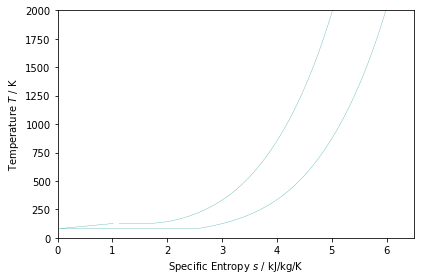

In [49]:
import CoolProp.Plots as CPP
import warnings
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
Tsplot = CPP.PropertyPlot('HEOS::Air', 'TS', unit_system = "KSI", tp_limits='NONE')
#Tsplot.calc_isolines(CoolProp.iQ, num=2)
plt.axis([0,6.5,0,2000])
Pa = 1.013*1e5
Pcomp = 30*1e5
Tsplot.calc_isolines(CoolProp.iP, iso_range = [Pa*1e-3, Pcomp*1e-3], num = 2, rounding = False)
Tsplot.show()